In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import corner

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [7]:

header = {}
header['dis+sidis'] = ['nrep'] + [f'{ia}{ib}' for ia in ['Qu', 'Qd', 'Qs', 'um1', 'dm1', 'sm1', 'GT', 'G2'] for ib in ['eta', 's10', '1']]
header['+pp'] = ['nrep', 'sol', 'chi'] + [f'{ia}{ib}' for ia in ['Qu', 'Qd', 'Qs', 'um1', 'dm1', 'sm1', 'GT', 'G2'] for ib in ['eta', 's10', '1']]

params = {} 
params['dis+sidis'] = pd.read_csv('../dsa_mc/dipoles/replica_params_dis.csv')
params['+pp'] = pd.read_csv('../dsa_mc/dipoles/replica_params_pp.csv')

for fit in params:
    params[fit] = params[fit].dropna(axis=1, how='all')
    params[fit].columns = header[fit]



In [11]:
# load moment params

mheader = {}
mheader = ['nrep'] + [f'{ia}{ib}' for ia in ['I3u', 'I3d', 'I3s', 'I3T', 'I4', 'I5'] for ib in ['eta', 's10', '1']]

mparams = {} 
mparams['+pp'] = pd.read_csv('../dsa_mc/dipoles/random_moment_params.csv')
mparams['+pp(constrained)'] = pd.read_csv('../dsa_mc/dipoles/moment_params_pp.csv')

for fit in mparams:
    mparams[fit] = mparams[fit].dropna(axis=1, how='all')
    mparams[fit].columns = mheader



In [13]:

columns = [f'{ia}{ib}' for ia in ['Qu', 'Qd', 'Qs', 'GT', 'G2'] for ib in ['eta', 's10', '1']]

for fit in params:
    params[fit]['label'] = fit

data = pd.concat([params['+pp'], params['dis+sidis']], ignore_index=True)

plot = sns.pairplot(
    data,
    vars=columns,     
    hue='label',             
    palette={
        '+pp': 'red'  ,
        'dis+sidis': 'blue'
    },
    plot_kws={
        's': 40,              
        'alpha': 0.3,        
        'marker': "o"     
    },
    corner=True,
    diag_kind="hist"
)

# Add vertical lines at x=0 on the diagonal axes
for i, var in enumerate(columns):
    ax = plot.axes[i, i]
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# plot.savefig('plots/param_plot.pdf', dpi=400)

plt.show()




KeyboardInterrupt: 

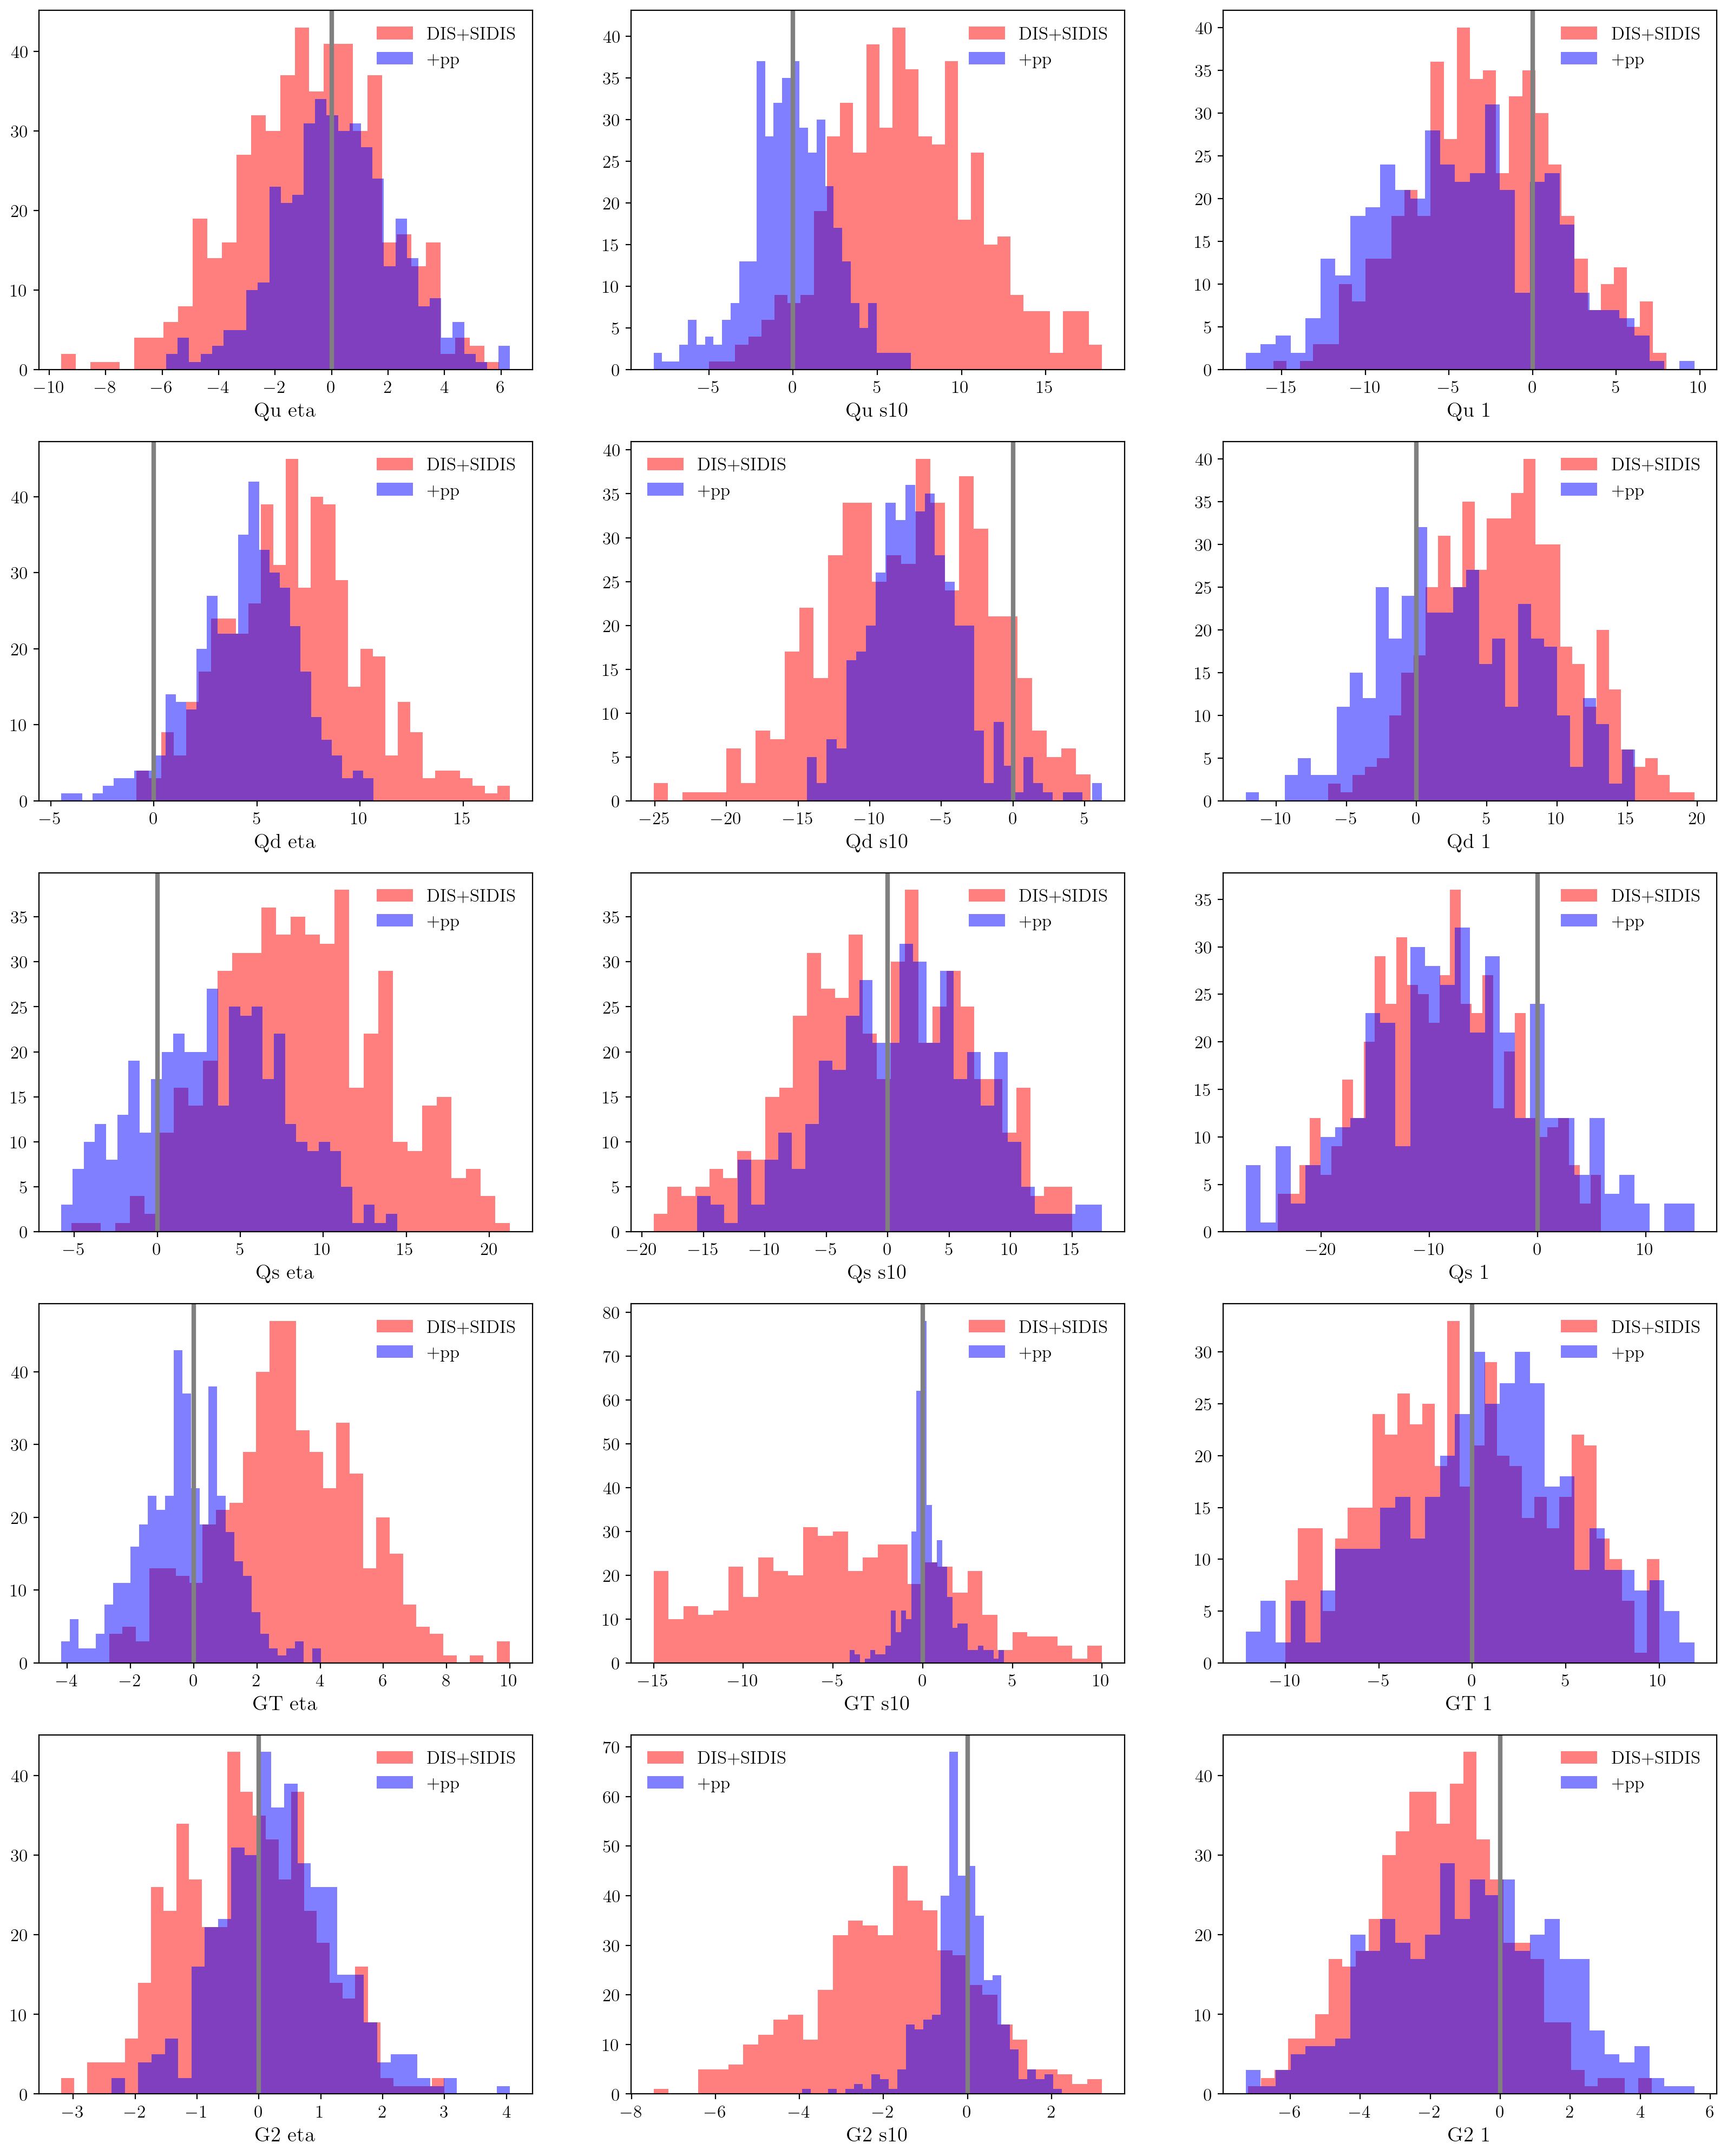

In [15]:
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(5, 3, figsize=(asp_ratio*psize*3, psize*5))

for iamp, amp in enumerate(['Qu', 'Qd', 'Qs', 'GT', 'G2']):
    for jbasis, basis in enumerate(['eta', 's10', '1']):
        axs[iamp, jbasis].hist(params['dis+sidis'][f'{amp}{basis}'], bins=30, color='red', alpha=0.5, label='DIS+SIDIS')
        axs[iamp, jbasis].hist(params['+pp'][f'{amp}{basis}'], bins=30, color='blue', alpha=0.5, label='+pp')
        axs[iamp, jbasis].set_xlabel(f'{amp} {basis}')
        axs[iamp, jbasis].axvline(x=0, color='gray', linestyle='-', linewidth=3)
        axs[iamp, jbasis].legend(frameon=False)

# fig.savefig('plots/params_hists.pdf', dpi=400)




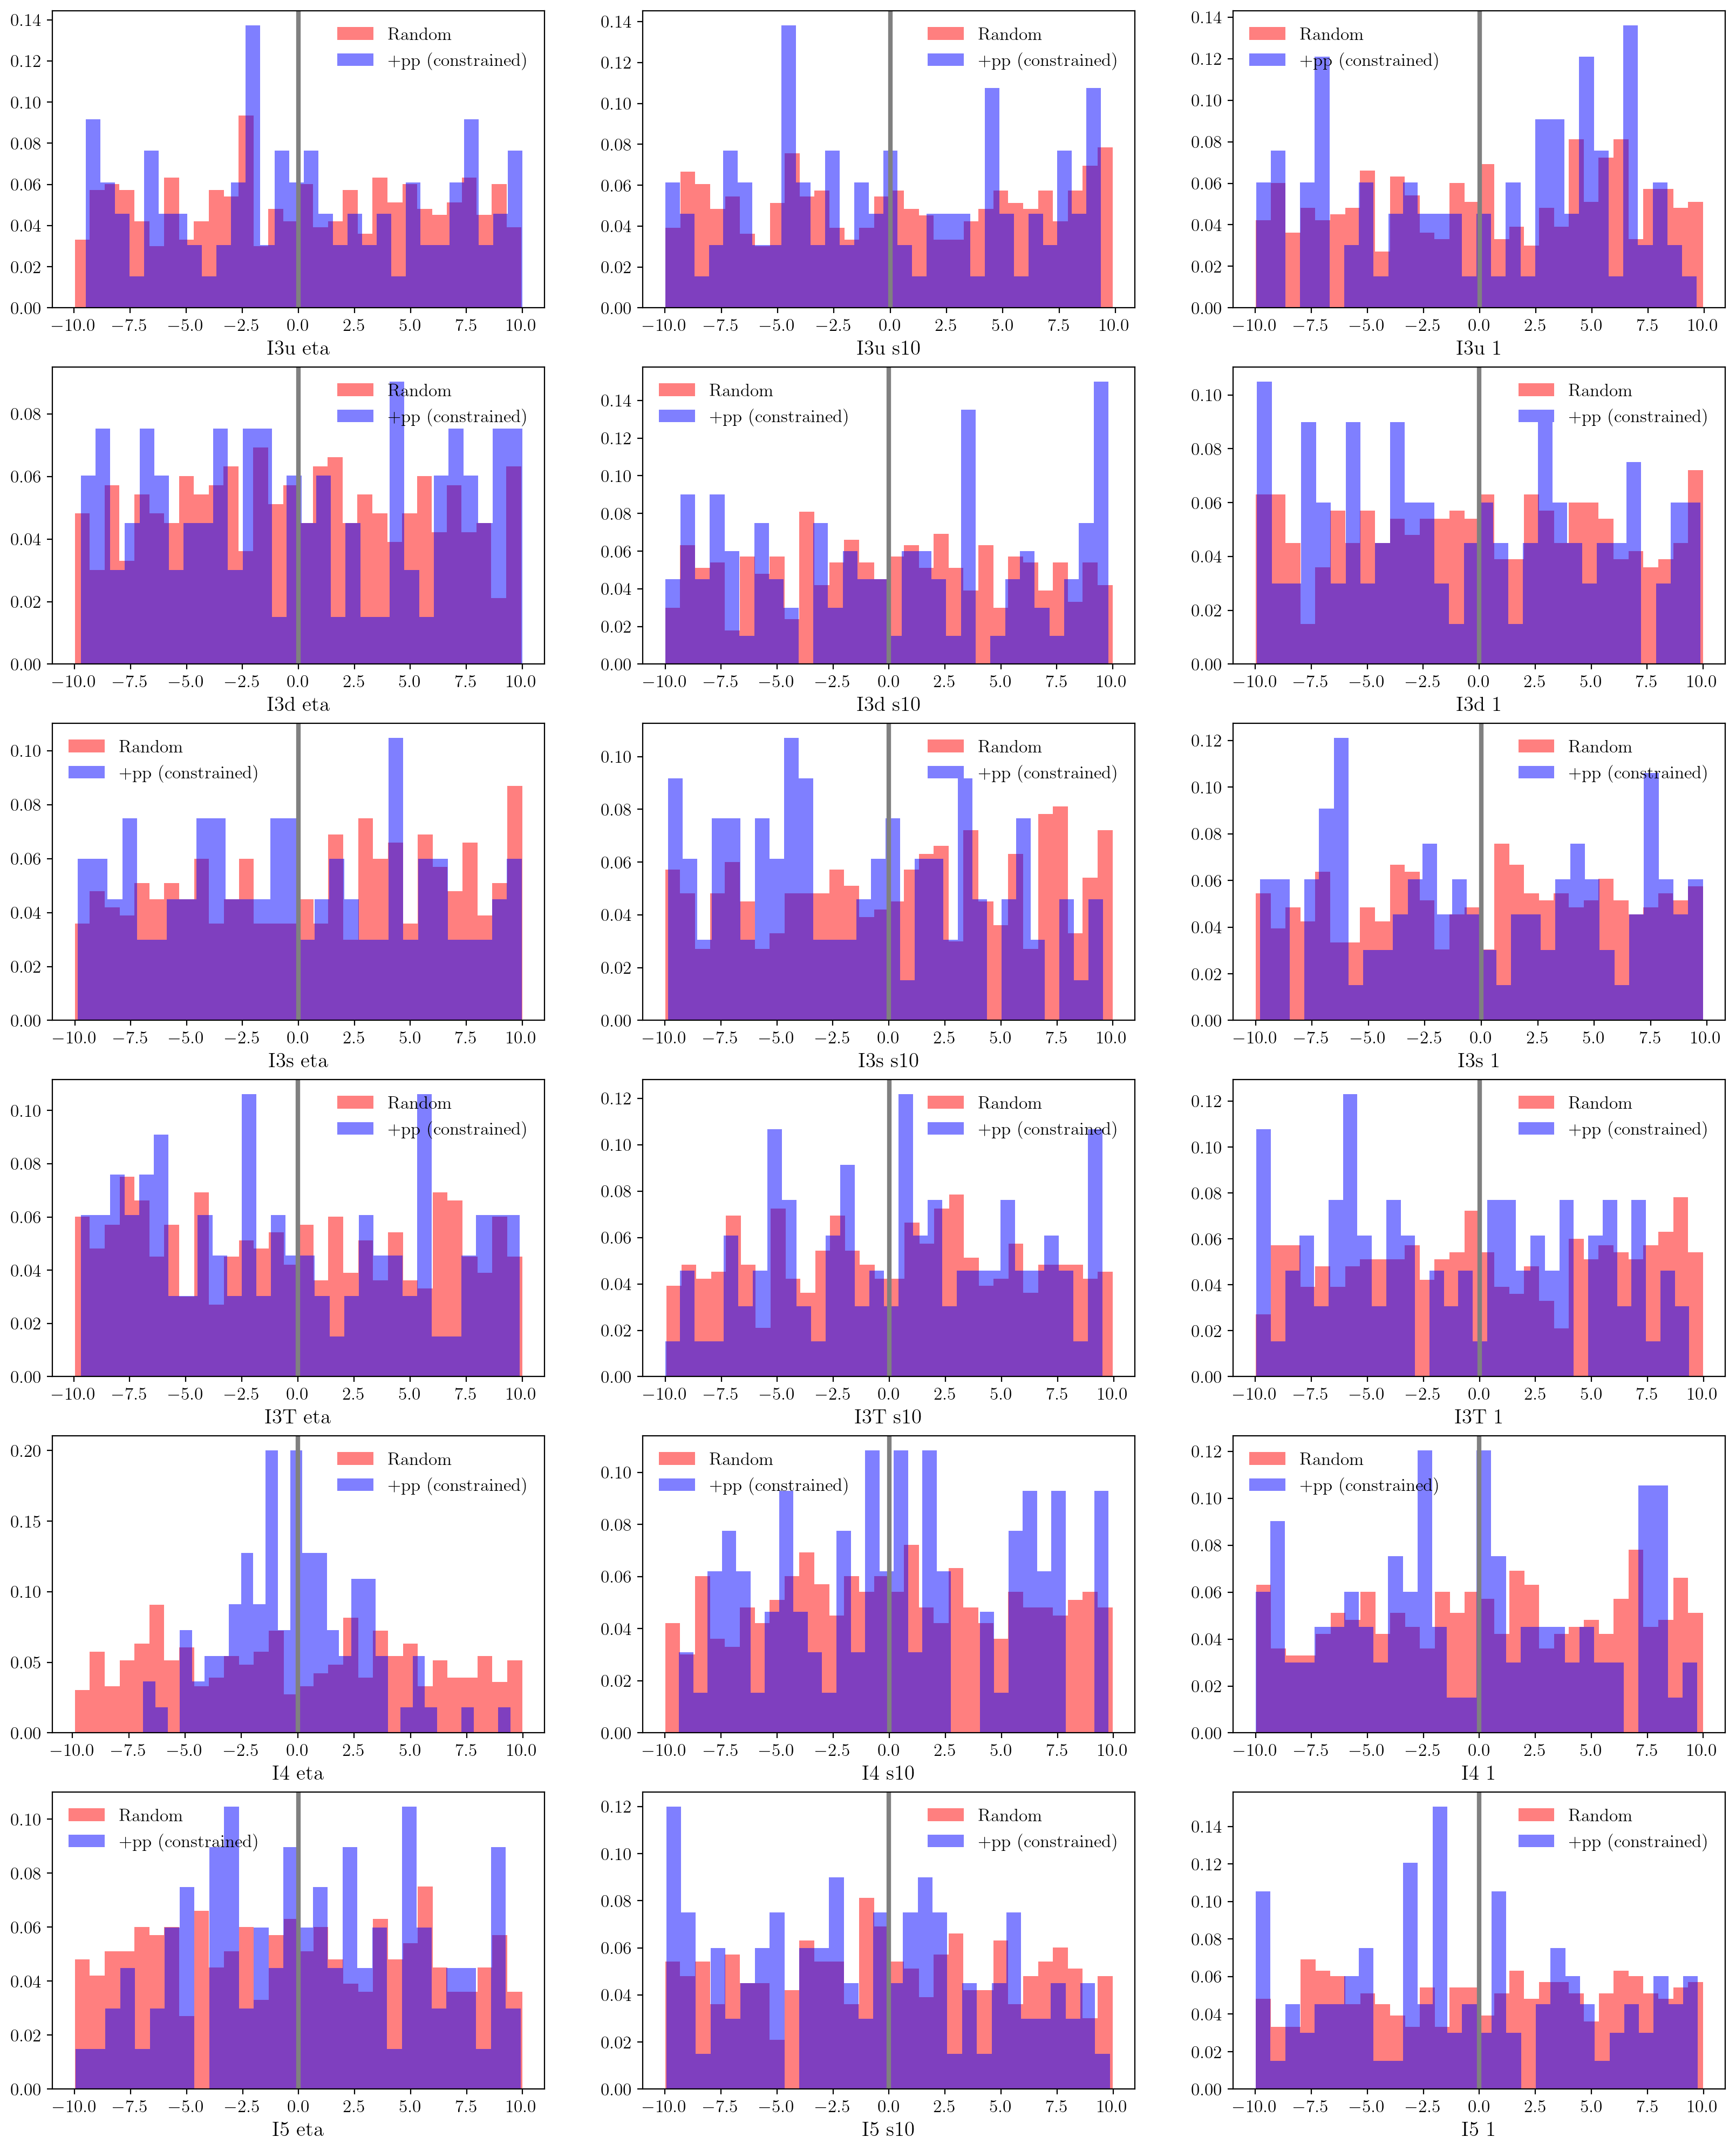

In [21]:
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(6, 3, figsize=(asp_ratio*psize*3, psize*5))

for iamp, amp in enumerate(['I3u', 'I3d', 'I3s', 'I3T', 'I4', 'I5']):
    for jbasis, basis in enumerate(['eta', 's10', '1']):
        axs[iamp, jbasis].hist(mparams['+pp'][f'{amp}{basis}'], bins=30, color='red', alpha=0.5, label='Random', density=True)
        axs[iamp, jbasis].hist(mparams['+pp(constrained)'][f'{amp}{basis}'], bins=30, color='blue', alpha=0.5, label='+pp (constrained)', density=True)
        axs[iamp, jbasis].set_xlabel(f'{amp} {basis}')
        axs[iamp, jbasis].axvline(x=0, color='gray', linestyle='-', linewidth=3)
        axs[iamp, jbasis].legend(frameon=False)
        

In [23]:
dict = {'a': 0, 'b': 1}

In [41]:
for key, value in dict.items():
    print(key, value)

a 0
b 1
